In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler

In [3]:
df_train = pd.read_csv('../datasets/complete_clean_train_extra.csv')
df_test = pd.read_csv('../datasets/complete_clean_test_extra.csv')

In [4]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,P,Y,NoSeWa,NoSewr
0,109,533352170,60,RL,68.0,13517,0,IR1,Lvl,CulDSac,...,0,0,3,2010,WD,130500,0,1,0,0
1,544,531379050,60,RL,43.0,11492,0,IR1,Lvl,CulDSac,...,0,0,4,2009,WD,220000,0,1,0,0
2,153,535304180,20,RL,68.0,7922,0,Reg,Lvl,Inside,...,0,0,1,2010,WD,109000,0,1,0,0
3,318,916386060,60,RL,73.0,9802,0,Reg,Lvl,Inside,...,0,0,4,2010,WD,174000,0,1,0,0
4,255,906425045,50,RL,82.0,14235,0,IR1,Lvl,Inside,...,0,0,3,2010,WD,138500,0,0,0,0


In [5]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,P,Y,NoSeWa,NoSewr
0,2658,902301120,190,RM,69.0,9142,0,Reg,Lvl,Inside,...,0,0,0,4,2006,WD,0,1,0.0,0
1,2718,905108090,90,RL,68.0,9662,0,IR1,Lvl,Inside,...,0,0,0,8,2006,WD,0,1,0.0,0
2,2414,528218130,60,RL,58.0,17104,0,IR1,Lvl,Inside,...,0,0,0,9,2006,New,0,1,0.0,0
3,1989,902207150,30,RM,60.0,8520,0,Reg,Lvl,Inside,...,0,0,0,7,2007,WD,0,0,0.0,0
4,625,535105100,20,RL,68.0,9500,0,IR1,Lvl,Inside,...,185,0,0,7,2009,WD,0,1,0.0,0


<AxesSubplot:>

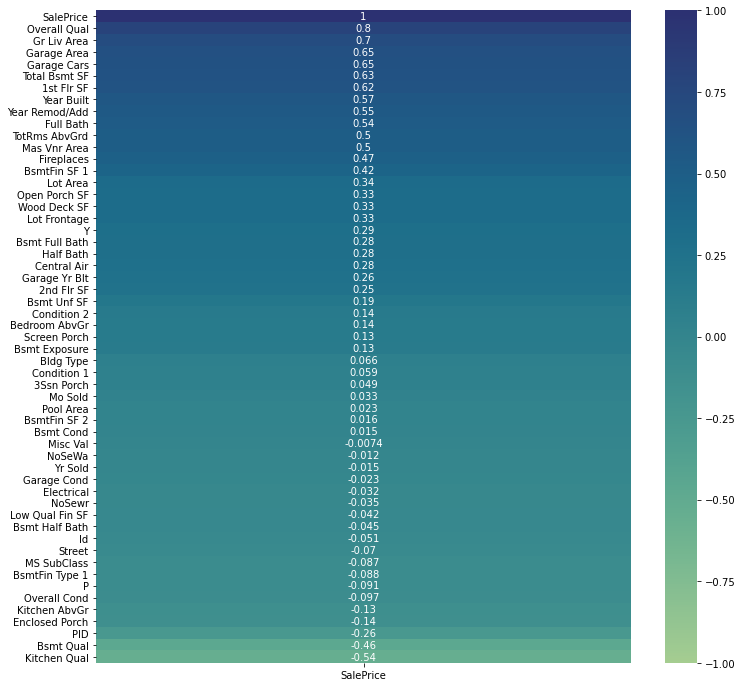

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),annot=True,cmap='crest',vmin =-1,vmax=1)

## Feature Engineering

In [7]:
df_train['Age'] = df_train['Yr Sold'] - df_train['Year Built']
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,...,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,P,Y,NoSeWa,NoSewr,Age
0,109,533352170,60,RL,68.0,13517,0,IR1,Lvl,CulDSac,...,0,3,2010,WD,130500,0,1,0,0,34
1,544,531379050,60,RL,43.0,11492,0,IR1,Lvl,CulDSac,...,0,4,2009,WD,220000,0,1,0,0,13
2,153,535304180,20,RL,68.0,7922,0,Reg,Lvl,Inside,...,0,1,2010,WD,109000,0,1,0,0,57
3,318,916386060,60,RL,73.0,9802,0,Reg,Lvl,Inside,...,0,4,2010,WD,174000,0,1,0,0,4
4,255,906425045,50,RL,82.0,14235,0,IR1,Lvl,Inside,...,0,3,2010,WD,138500,0,0,0,0,110


In [8]:
df_test['Age'] = df_test['Yr Sold'] - df_test['Year Built']
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,P,Y,NoSeWa,NoSewr,Age
0,2658,902301120,190,RM,69.0,9142,0,Reg,Lvl,Inside,...,0,0,4,2006,WD,0,1,0.0,0,96
1,2718,905108090,90,RL,68.0,9662,0,IR1,Lvl,Inside,...,0,0,8,2006,WD,0,1,0.0,0,29
2,2414,528218130,60,RL,58.0,17104,0,IR1,Lvl,Inside,...,0,0,9,2006,New,0,1,0.0,0,0
3,1989,902207150,30,RM,60.0,8520,0,Reg,Lvl,Inside,...,0,0,7,2007,WD,0,0,0.0,0,84
4,625,535105100,20,RL,68.0,9500,0,IR1,Lvl,Inside,...,0,0,7,2009,WD,0,1,0.0,0,46


Determining if a house was remodeled by checking if Year Built and Year Remodeled/Add unequal.

In [9]:
df_train['Remodel'] = 0

In [10]:
df_train.loc[df_train['Year Remod/Add']!=df_train['Year Built'],'Remodel'] = 1

In [11]:
df_train['Remodel'].sum()

950

In [12]:
df_test['Remodel'] = 0
df_test.loc[df_test['Year Remod/Add'] != df_test['Year Built'],'Remodel'] = 1

In [13]:
df_test['Remodel'].sum()

410

In [14]:
df_train.to_csv('../datasets/complete_clean_train_extra.csv',index=False)

In [15]:
df_test.to_csv('../datasets/complete_clean_test_extra.csv',index=False)